In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL #image libary in python
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir = "/content/drive/MyDrive/archive.zip (Unzipped Files)/utkface_aligned_cropped/UTKFace"

In [3]:
#converting this data directory into  a pathlib
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/archive.zip (Unzipped Files)/utkface_aligned_cropped/UTKFace')

In [4]:
img_count = len(list(data_dir.glob('*.jpg')))
img_count

23708

In [5]:
import os
# Example filename
filename = "26_1_0_20170117201629485.jpg.chip"
# Split the filename by underscores
filename_parts = filename.split('_')
# Extract the age (first part of the filename)
age = int(filename_parts[0])

print("Age extracted from filename:", age)

Age extracted from filename: 26


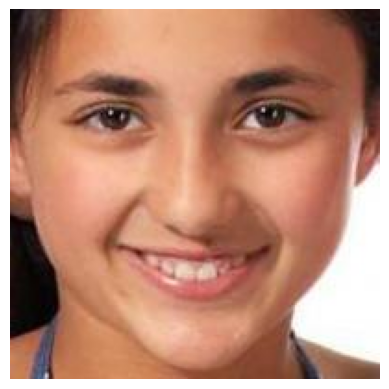

In [6]:
from PIL import Image
image_path = "/content/drive/MyDrive/archive.zip (Unzipped Files)/utkface_aligned_cropped/UTKFace/16_1_0_20170109204349968.jpg.chip.jpg"
image = Image.open(image_path)
image.show()
plt.imshow(image)
plt.axis('off')
plt.show()

In [7]:
filenames = os.listdir(data_dir)

In [8]:
ages = []
for filename in filenames:
    # Split the filename by underscores
    filename_parts = filename.split('_')
    # Extract the age (first part of the filename)
    age = int(filename_parts[0])
    ages.append(age)

In [9]:
# Load images and preprocess them
images = []
for filename in filenames:
    # Construct the full path to the image
    image_path = os.path.join(data_dir, filename)
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0  # Normalize pixel values to [0, 1]

    # Append the image to the list of images
    images.append(img)

In [10]:
# Convert the lists to numpy arrays
images = np.array(images)
ages = np.array(ages)

In [11]:
print("Shape of images array:", images.shape)
print("Shape of ages array:", ages.shape)

Shape of images array: (23708, 100, 100, 3)
Shape of ages array: (23708,)


In [12]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, ages , test_size= 0.15, random_state=42)

In [13]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [14]:
len(X_train)

20151

In [15]:
len(X_test)

3557

In [16]:
X_train[0]

array([[[0.08627451, 0.01960784, 0.05490196],
        [0.10588235, 0.04705882, 0.0627451 ],
        [0.11764706, 0.0627451 , 0.05098039],
        ...,
        [0.38039216, 0.3254902 , 0.29411765],
        [0.48235294, 0.38039216, 0.29803922],
        [0.61176471, 0.4627451 , 0.34117647]],

       [[0.08235294, 0.01568627, 0.04705882],
        [0.10588235, 0.04313725, 0.05098039],
        [0.12156863, 0.05882353, 0.03921569],
        ...,
        [0.3254902 , 0.28235294, 0.24705882],
        [0.4627451 , 0.36862745, 0.29411765],
        [0.58431373, 0.44705882, 0.33333333]],

       [[0.07058824, 0.00784314, 0.01960784],
        [0.11372549, 0.04313725, 0.04313725],
        [0.14117647, 0.07058824, 0.04313725],
        ...,
        [0.29019608, 0.2627451 , 0.23529412],
        [0.40784314, 0.33333333, 0.26666667],
        [0.56862745, 0.45098039, 0.35686275]],

       ...,

       [[0.04705882, 0.01568627, 0.00784314],
        [0.08627451, 0.00784314, 0.        ],
        [0.31372549, 0

In [17]:
X_train_scaled[0]

array([[[3.38331411e-04, 7.68935025e-05, 2.15301807e-04],
        [4.15224913e-04, 1.84544406e-04, 2.46059208e-04],
        [4.61361015e-04, 2.46059208e-04, 1.99923106e-04],
        ...,
        [1.49173395e-03, 1.27643214e-03, 1.15340254e-03],
        [1.89158016e-03, 1.49173395e-03, 1.16878124e-03],
        [2.39907728e-03, 1.81468666e-03, 1.33794694e-03]],

       [[3.22952710e-04, 6.15148020e-05, 1.84544406e-04],
        [4.15224913e-04, 1.69165705e-04, 1.99923106e-04],
        [4.76739715e-04, 2.30680507e-04, 1.53787005e-04],
        ...,
        [1.27643214e-03, 1.10726644e-03, 9.68858131e-04],
        [1.81468666e-03, 1.44559785e-03, 1.15340254e-03],
        [2.29142637e-03, 1.75317186e-03, 1.30718954e-03]],

       [[2.76816609e-04, 3.07574010e-05, 7.68935025e-05],
        [4.45982314e-04, 1.69165705e-04, 1.69165705e-04],
        [5.53633218e-04, 2.76816609e-04, 1.69165705e-04],
        ...,
        [1.13802384e-03, 1.03037293e-03, 9.22722030e-04],
        [1.59938485e-03, 1.30

In [30]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

# Define the model architecture with batch normalization
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1)
])

In [31]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 batch_normalization_14 (Ba  (None, 98, 98, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 batch_normalization_15 (Ba  (None, 47, 47, 64)        256       
 tchNormalization)                                               
                                                      

In [32]:
# Define the number of epochs and batch size
epochs = 40
batch_size = 32

In [ ]:
# Train the model with validation data
history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_scaled, y_test))

Epoch 1/40
630/630 [==============================] - 18s 21ms/step - loss: 706.7658 - mae: 21.3815 - val_loss: 301.3945 - val_mae: 14.7137
Epoch 2/40
630/630 [==============================] - 12s 19ms/step - loss: 163.1966 - mae: 9.6195 - val_loss: 165.1606 - val_mae: 9.4557
Epoch 3/40
630/630 [==============================] - 12s 19ms/step - loss: 134.9880 - mae: 8.7554 - val_loss: 340.4447 - val_mae: 13.8385
Epoch 4/40
630/630 [==============================] - 12s 19ms/step - loss: 121.4132 - mae: 8.2496 - val_loss: 377.3086 - val_mae: 15.7178
Epoch 5/40
630/630 [==============================] - 12s 19ms/step - loss: 111.5344 - mae: 7.9590 - val_loss: 353.1622 - val_mae: 13.7088
Epoch 6/40
630/630 [==============================] - 12s 19ms/step - loss: 100.0589 - mae: 7.5206 - val_loss: 796.5579 - val_mae: 24.1642
Epoch 7/40
630/630 [==============================] - 12s 19ms/step - loss: 94.9837 - mae: 7.3635 - val_loss: 440.5928 - val_mae: 15.1040
Epoch 8/40
304/630 [========

In [26]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)

112/112 [==============================] - 1s 8ms/step - loss: 347.4114 - mae: 14.7354


In [27]:
print("Test Loss:", test_loss)
print("Test MAE:", test_mae)

Test Loss: 347.411376953125
Test MAE: 14.735377311706543


In [28]:
import matplotlib.pyplot as plt

# Get the training and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


KeyError: 'val_loss'